In [1]:
import bnn
root_dir = bnn.bnn.BNN_ROOT_DIR
param_dir = bnn.bnn.BNN_PARAM_DIR

print(root_dir)
print(param_dir)

/opt/python3.6/lib/python3.6/site-packages/bnn
/opt/python3.6/lib/python3.6/site-packages/bnn/params


In [2]:

import os 
training_dir = "/home/xilinx"
print(training_dir)


/home/xilinx


In [3]:
!cp -r $training_dir/fashion-mnist-lfc $param_dir/
bnn.available_params(bnn.NETWORK_LFC)

['chars_merged', 'mnist', 'fashion-mnist-lfc']

In [4]:
c = bnn.PynqBNN(network=bnn.NETWORK_LFC)
c.load_parameters("fashion-mnist-lfc")
print(c.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Inference took 98.00 microseconds
Classification rate: 10204.08 images per second
Predicted class: Dress


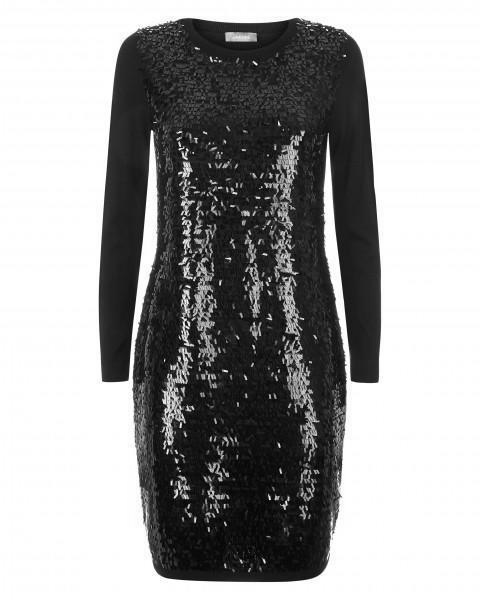

In [5]:
from PIL import Image
from IPython.display import display
# load image using PIL and convert to black and white
img_test = Image.open("/home/xilinx/jupyter_notebooks/bnn/images/4.jpg").convert("L")
img_test
with open("mnist-formatted", "wb") as fp:
 c.image_to_mnist(img_test, fp, invert=True)
ret = c.inference("mnist-formatted")
print("Predicted class: " + c.classes[ret])
#img.thumbnail((64, 64), Image.ANTIALIAS)
display(img_test) 

In [7]:
!wget -nc http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz; gunzip -f t10k-images-idx3-ubyte.gz
!wget -nc http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz; gunzip -f t10k-labels-idx1-ubyte.gz

--2018-11-11 14:17:56--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.23
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.72.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4422102 (4.2M) [binary/octet-stream]
Saving to: ‘t10k-images-idx3-ubyte.gz’

t10k-images-idx3-ub 100%[=====================>]   4.22M  3.08MB/s   in 1.4s   

2018-11-11 14:17:58 (3.08 MB/s) - ‘t10k-images-idx3-ubyte.gz’ saved [4422102/4422102]

--2018-11-11 14:17:59--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.23
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com

In [8]:
!ls *ubyte

t10k-images-idx3-ubyte	t10k-labels-idx1-ubyte


In [9]:
ret = c.inference_multiple("t10k-images-idx3-ubyte")

Inference took 69150.00 microseconds, 6.91 usec per image
Classification rate: 144613.16 images per second


In [11]:
import numpy as np
with open("t10k-labels-idx1-ubyte", 'rb') as f:
  ret_test_golden = np.frombuffer(f.read(), np.uint8, offset=8)
np.unique(ret_test_golden == ret, return_counts=True)

(array([False,  True], dtype=bool), array([1513, 8487]))